# Load and process molecules with `rdkit`

This notebook does the following:
- Molecules downloaded in the [previous notebook](./ 1_Get_Molecular_libraries.ipynb) are processed using `rdkit`.

The output of this notebook is a the file `rdKit_db_molecules.obj`, which is a pandas data frame containing the rdkit object of each molecule.

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import sys
sys.path.append('../..')
from helper_modules.analyze_molecules_with_rdkit import *

## DEKOIS Molecules

In [3]:
sdf_input_path = './datasets/DEKOIS2/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
df_DEKOIS = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
print(df_DEKOIS.shape)
df_DEKOIS.head()

(1240, 3)


,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3109df0>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3109da0>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3109e40>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3109e90>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3109ee0>,True


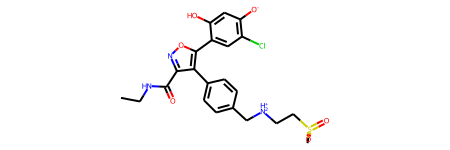

In [4]:
df_DEKOIS.loc['ligand_4', 'mol_rdk']

## DUD 2006

In [5]:
sdf_input_path = './datasets/DUD/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
df_DUD = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
print(df_DUD.shape)
df_DUD.head()

(1016, 3)


,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3152350>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a31522b0>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3152210>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3152170>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a31520d0>,True


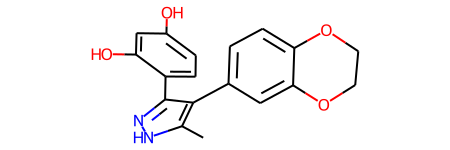

In [6]:
df_DUD.loc['ligand_4', 'mol_rdk']

## Cocrystalized molecules

In [7]:
# Path to SDF Files
sdf_input_path = './datasets/COCRYS/sdf/'
# Function to sort the molecules by their PDB id
sort_function = lambda x: x.split('/')[-1].split('_')[0]
# Get the list of files
list_sdf_files = get_files_list(sdf_input_path, 
                                actives_name='LIG', 
                                sufix='', 
                                sort_func = sort_function
                               )
# Compute a dataframe with the molecules as rdkit objects
df_pdi_lig = load_cocrys_molecules_from_dir(list_sdf_files)

# Update the dataframe
df_COCRYS = df_pdi_lig[['Lig', 'mol_rdk']]
df_COCRYS['Activity'] = 'active'
df_COCRYS['sanitized'] = [True if i != 'v3' else False for i in df_pdi_lig.validation]
df_COCRYS = df_COCRYS[['Lig', 'Activity', 'mol_rdk', 'sanitized']]
# Drop duplicates
df_COCRYS = df_COCRYS.drop_duplicates('Lig').set_index('Lig')
df_COCRYS.sanitized.value_counts()
print('Shape', df_COCRYS.shape)
df_COCRYS.head()

Shape (200, 3)


,Activity,mol_rdk,sanitized
Lig,,,
ADP,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3157e90>,True
KOS,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3157df0>,True
PU3,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3157d50>,True
PU4,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3157cb0>,True
PU5,active,<rdkit.Chem.rdchem.Mol object at 0x7fc3a3157c10>,True


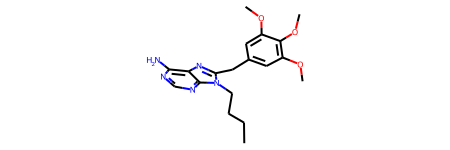

In [8]:
df_COCRYS.loc['PU3', 'mol_rdk']

## Merge all dataframes

In [9]:
list_dfs = [df_COCRYS, df_DEKOIS, df_DUD]
list_dfs_names = ['COCRYS', 'DEKOIS2', 'DUD']

# Create the final dataframe
df_all_libraries = pd.concat(list_dfs, keys = list_dfs_names)
df_all_libraries['Activity'] = df_all_libraries['Activity']\
                                    .replace({'active': 1, 'inactive': 0})
df_all_libraries

Activity                                           mol_rdk  \
       Lig                                                                     
COCRYS ADP               1  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3157e90>   
       KOS               1  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3157df0>   
       PU3               1  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3157d50>   
       PU4               1  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3157cb0>   
       PU5               1  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3157c10>   
...                    ...                                               ...   
DUD    decoy_975         0  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3133080>   
       decoy_976         0  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3133120>   
       decoy_977         0  <rdkit.Chem.rdchem.Mol object at 0x7fc3a31331c0>   
       decoy_978         0  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3133260>   
       decoy_979         0  <rdkit.Chem.rdchem.Mol object at 0x7fc3a3133300>   

                 sanitized  
       Lig                  
COCRYS ADP            True  
       KOS            True  
       PU3            True  
       PU4            True  
       PU5            True  
...                    ...  
DUD    decoy_975     False  
       decoy_976     False  
       decoy_977     False  
       decoy_978     False  
       decoy_979     False  

[2456 rows x 3 columns]

In [10]:
# Save the dataframe
output_file = './rdKit_db_molecules.obj'
if not Path(output_file).exists():
    df_all_libraries.to_pickle(output_file)